#PCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # 손글씨 이미지 (64차원)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X,y = load_digits(return_X_y=True)

In [ ]:
X

In [ ]:
y

In [ ]:
# 데이터 표준화
# 평균이 0, 분산이 1인값으로 변환
# 그래서 음수 나와도 됨

X_scaled = StandardScaler().fit_transform(X)
X_scaled

In [ ]:
# pca전 시각화
plt.figure(figsize=(10,8))
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap='tab10', alpha=0.5, edgecolor='k')
plt.xlabel("X1")
plt.ylabel("X2")
# 객체 집어넣으면
plt.colorbar(scatter)
plt.show()

In [ ]:
# pca 차원 축소
# 몇 차원까지 줄일거냐
# 원래 elbow method로 숫자 정해야됨.
pca = PCA(n_components=10).fit(X)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', alpha=0.5, edgecolor='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("pca 시각화")
# 객체 집어넣으면
# plt.colorbar(X_pca)
plt.show()

In [ ]:
#scree plot
plt.figure(figsize=(12,8))
plt.plot(
    range(1,len(pca.explained_variance_ratio_)+1), # x축의 범위
    pca.explained_variance_, # Y축의 범위
    marker='o',
    linestyle='--',
)
plt.grid(True)
plt.show()

In [11]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [12]:
wine = load_wine()
X, y = wine.data, wine.target

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

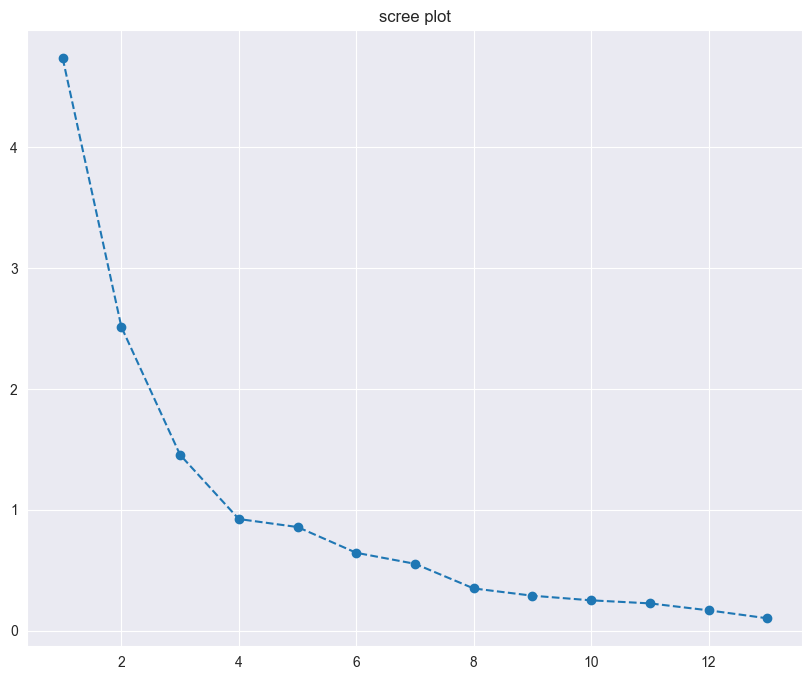

In [14]:
#Pca 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
plt.plot(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_,
    marker='o',
    linestyle='--',
)
plt.title("scree plot")
plt.grid(True)
plt.show()

In [19]:
pca = PCA(n_components=2).fit(X)
X_pca_all = pca.fit_transform(X_scaled)

X_pca_2d = pca.fit_transform(X_scaled)

In [27]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca_2d) #학습과 동시에 클러스터 라벨 예측 한번에 하는 함수

In [28]:
# 클러스터링 평가 (실루엣 스ㅗ어)
sil_score = silhouette_score(X_pca_2d, clusters)
sil_score

np.float64(0.4235706060721868)

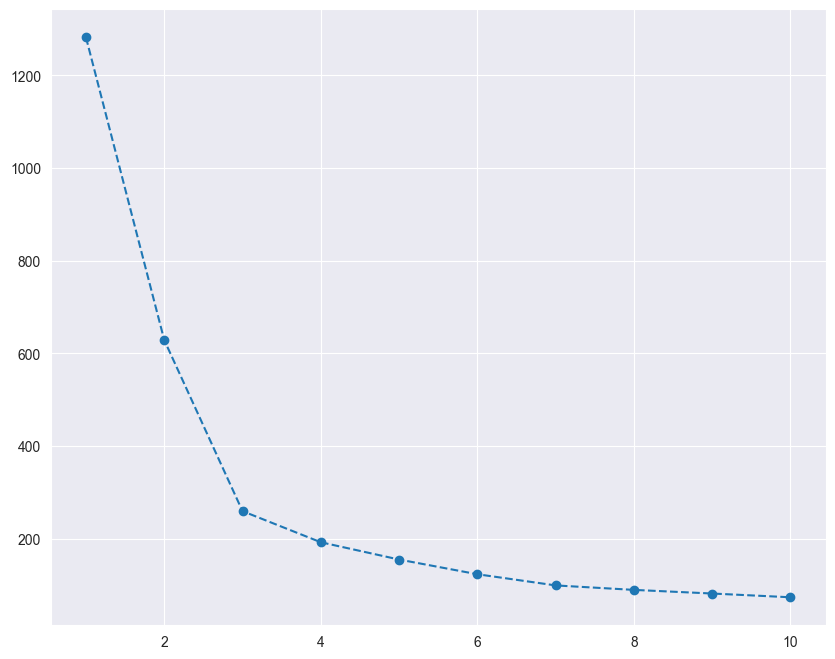

In [33]:
# scree plot
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    clusters = kmeans.fit_predict(X_pca_2d)
    kmeans.fit(X_pca_2d)
    sse.append(kmeans.inertia_) #각 클러스터의 중심에서 데이터까지 거리제곱의 합

plt.figure(figsize=(10,8))

#
plt.plot(
    k_range, sse, marker='o', linestyle='--',
)
plt.grid(True)
plt.show()
# k가 3일때 실루엣 스코어가 가장 높다!

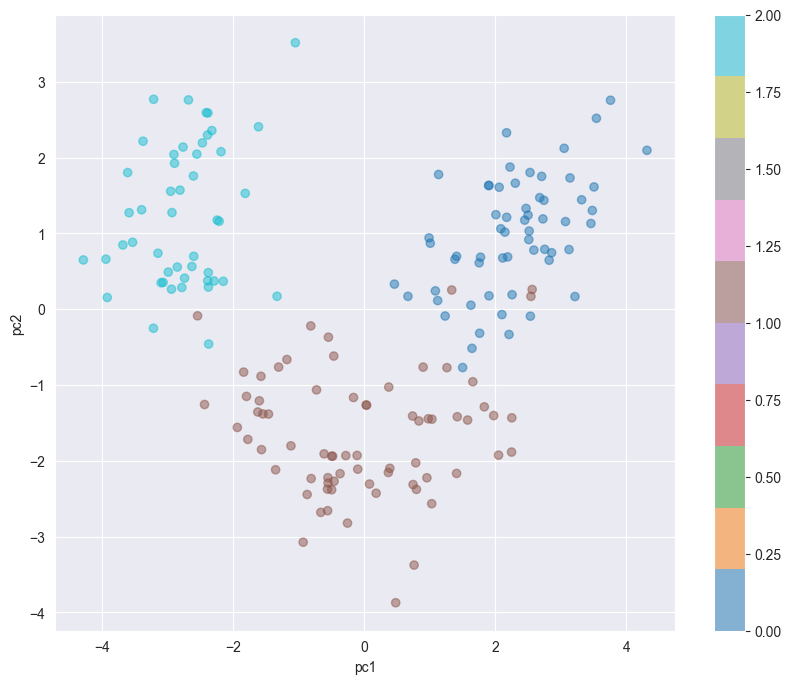

In [32]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='tab10', alpha=0.5 )
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.colorbar(scatter)
plt.show()